In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
DATA_PATH = Path.cwd().parent.joinpath('data', 'processed')

returns_data = pd.read_table(DATA_PATH.joinpath('visualization', 'performance_data.txt'), parse_dates={'date': ['year', 'month']})
weights_data = pd.read_table(DATA_PATH.joinpath('visualization', 'weights_data.txt'), parse_dates={'date': ['year', 'month']})
weights_data = weights_data.fillna(0)

In [3]:
returns_data.corr()

,actual_ret,expected_ret,sharpe
actual_ret,1.000000,0.563375,-0.280419
expected_ret,0.563375,1.000000,-0.337947
sharpe,-0.280419,-0.337947,1.000000


In [4]:
mean = returns_data.actual_ret.mean()
std = returns_data.actual_ret.std()
print(f'Actual:\t\t{mean:.4f} ({std:.4f}) ({mean-1.96*std:.4f}, {mean+1.96*std:.4f})')

mean = returns_data.expected_ret.mean()
std = returns_data.expected_ret.std()
print(f'Expected:\t{mean:.4f} ({std:.4f}) ({mean-1.96*std:.4f}, {mean+1.96*std:.4f})')

mean = returns_data.sharpe.mean()
std = returns_data.sharpe.std()
print(f'Sharpe Ratio:\t{mean:.4f} ({std:.4f}) ({mean-1.96*std:.4f}, {mean+1.96*std:.4f})')

Actual:		0.0476 (0.1699) (-0.2854, 0.3806)
Expected:	0.3307 (0.2522) (-0.1635, 0.8250)
Sharpe Ratio:	0.3444 (0.2061) (-0.0595, 0.7484)


### Actual and Expected Returns

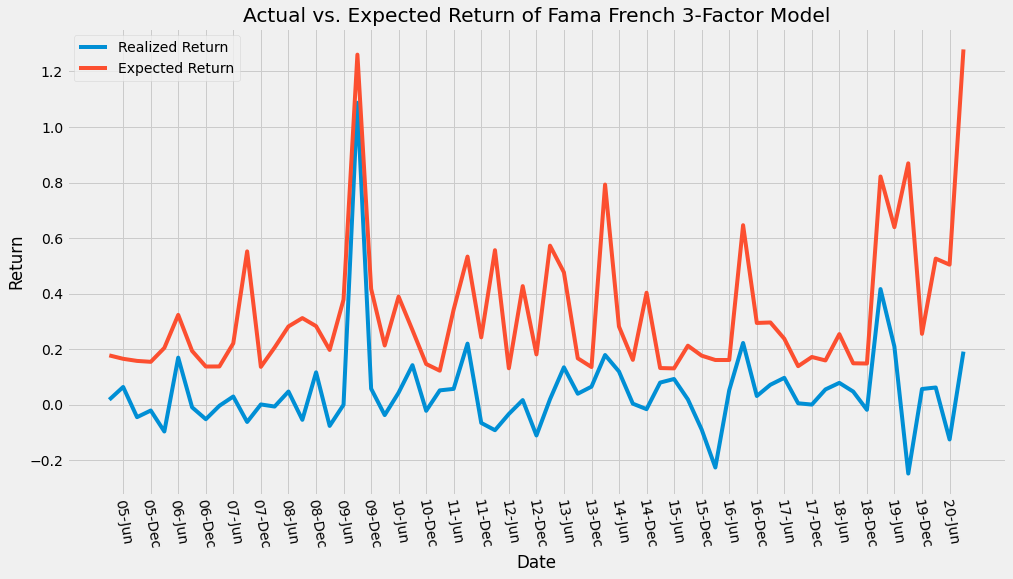

In [5]:
fig = plt.figure(figsize=(15, 8))
plt.plot(returns_data.date, returns_data.actual_ret, label='Realized Return')
plt.plot(returns_data.date, returns_data.expected_ret, label='Expected Return')
plt.title('Actual vs. Expected Return of Fama French 3-Factor Model')
plt.legend()
plt.ylabel('Return')
plt.xlabel('Date')
plt.xticks(returns_data.date[1::2], labels=returns_data.date[1::2].dt.strftime('%y-%b'), rotation=-80)
plt.show()

### Portfolio Alpha

In [ ]:
alphas = list()
for dt in weights_data.date:
    file = dt.strftime('%Y.%m.txt')
    df = pd.read_table(DATA_PATH.joinpath('factor_data', 'alphas', file))
    subset = weights_data[weights_data.date==dt].drop('date', axis=1).T
    subset.columns = ['weight']
    subset = subset.merge(df, how='left', left_index=True, right_on='tic')
    subset = subset[subset.weight!=0]
    a = (subset.weight * subset.alpha).sum()
    alphas.append(a)

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.plot(weights_data.date, alphas)
plt.title('Portfolio Alpha')
plt.ylabel('Alpha')
plt.xlabel('Date')
plt.xticks(weights_data.date[1::2], labels=weights_data.date[1::2].dt.strftime('%y-%b'), rotation=-80)
plt.show()

### Modified Alpha

In [6]:
mod_returns_data = pd.read_table(DATA_PATH.joinpath('visualization', 'modified_alpha_performance_data.txt'), parse_dates={'date': ['year', 'month']})
mod_weights_data = pd.read_table(DATA_PATH.joinpath('visualization', 'modified_alpha_weights_data.txt'), parse_dates={'date': ['year', 'month']})
weights_data = weights_data.fillna(0)

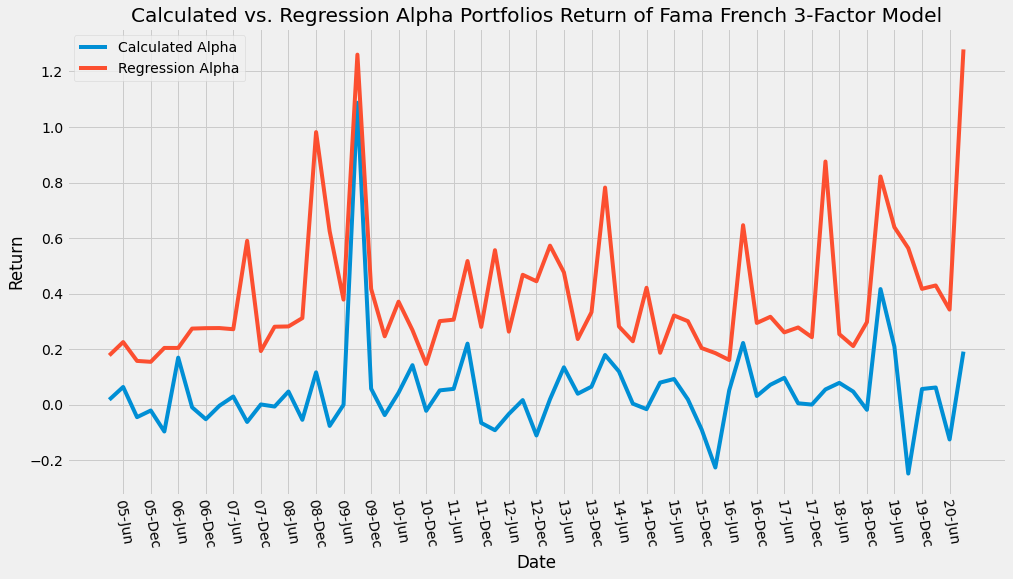

In [7]:
fig = plt.figure(figsize=(15, 8))
plt.plot(returns_data.date, returns_data.actual_ret, label='Calculated Alpha')
plt.plot(mod_returns_data.date, mod_returns_data.expected_ret, label='Regression Alpha')
plt.title('Calculated vs. Regression Alpha Portfolios Return of Fama French 3-Factor Model')
plt.legend()
plt.ylabel('Return')
plt.xlabel('Date')
plt.xticks(returns_data.date[1::2], labels=returns_data.date[1::2].dt.strftime('%y-%b'), rotation=-80)
plt.show()

## Sensitivity Analysis

In [8]:
SENSITIVITY = DATA_PATH.joinpath('sensitivity_analysis')

#### Basket Size

10:	0.06513686364148474	0.21795970580979956	Sharpe: 0.257994605032132
100:	0.050709631330172	0.24709069248938867	Sharpe: 0.6192864971509092
20:	0.05565944039999186	0.1867285697063728	Sharpe: 0.3450936843794914
4:	0.05341233057073371	0.2126257137278697	Sharpe: 0.21035153680844867
50:	0.06258771769489639	0.23009294462756527	Sharpe: 0.4951618377247433


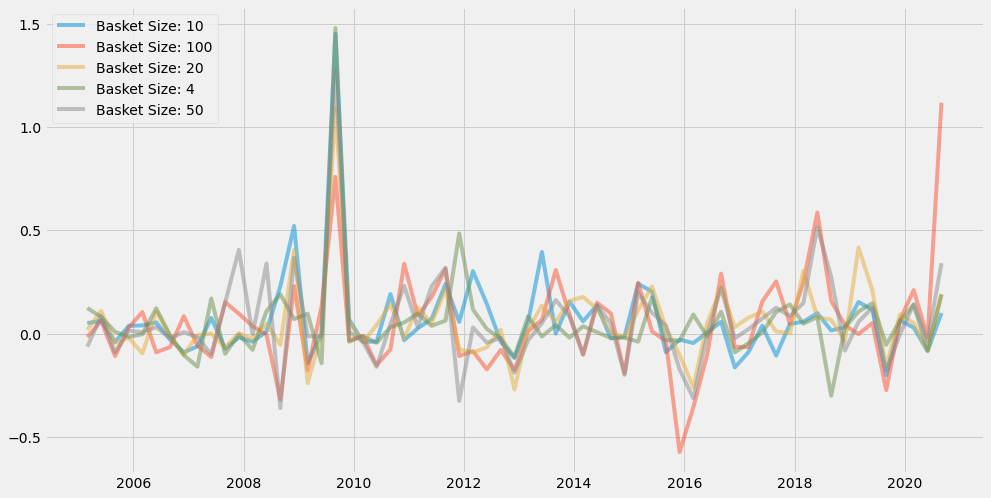

In [9]:
plt.figure(figsize=(15, 8))
for file in SENSITIVITY.joinpath('basket_size').glob('performance*'):
    df = pd.read_table(file, parse_dates={'date': ['year', 'month']})
    num = file.name.split('_')[-1][:-4]
    print(f'{num}:\t{df.actual_ret.mean()}\t{df.actual_ret.std()}\tSharpe: {df.sharpe.mean()}')

    plt.plot(df.date, df.actual_ret, label=f'Basket Size: {num}', alpha=0.5)

# plt.title('Calculated vs. Regression Alpha Portfolios Return of Fama French 3-Factor Model')
plt.legend()
# plt.ylabel('Return')
# plt.xlabel('Date')
# plt.xticks(returns_data.date[1::2], labels=returns_data.date[1::2].dt.strftime('%y-%b'), rotation=-80)

#### Market Exposure

-0.5:	0.07567792755125394	0.23564754607454683	Sharpe: 0.2736112218914605
-1:	0.08661649178667137	0.3256688705113928	Sharpe: 0.22283970731185426
0.5:	0.06696526225255207	0.2821433949507032	Sharpe: 0.3873333099765803
0:	0.05565944039999186	0.1867285697063728	Sharpe: 0.3450936843794914
1:	0.10679238186959801	0.34263499902712924	Sharpe: 0.4040123958569275


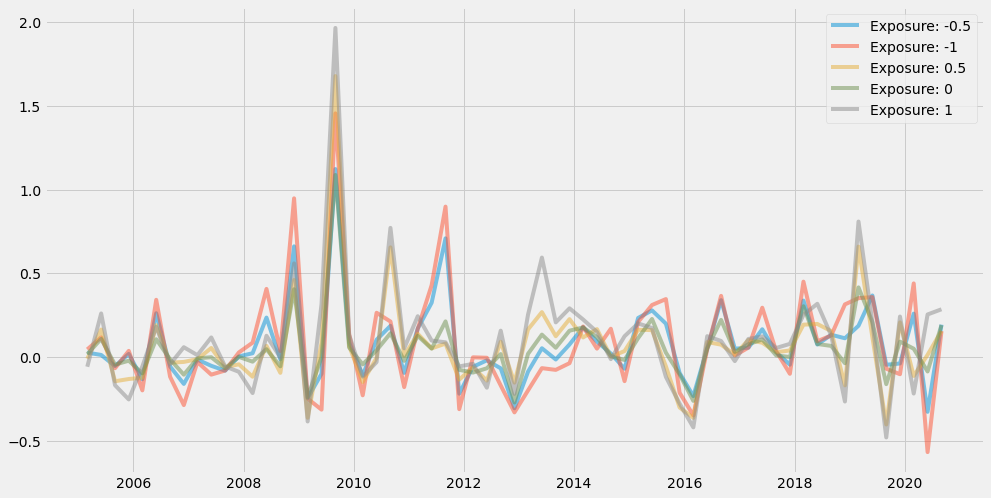

In [10]:
plt.figure(figsize=(15, 8))
for file in SENSITIVITY.joinpath('exposure').glob('performance*'):
    df = pd.read_table(file, parse_dates={'date': ['year', 'month']})
    num = file.name.split('_')[-1][:-4]
    print(f'{num}:\t{df.actual_ret.mean()}\t{df.actual_ret.std()}\tSharpe: {df.sharpe.mean()}')

    plt.plot(df.date, df.actual_ret, label=f'Exposure: {num}', alpha=0.5)

# plt.title('Calculated vs. Regression Alpha Portfolios Return of Fama French 3-Factor Model')
plt.legend()
# plt.ylabel('Return')
# plt.xlabel('Date')
# plt.xticks(returns_data.date[1::2], labels=returns_data.date[1::2].dt.strftime('%y-%b'), rotation=-80)